In [ ]:
# ISEN 614 Project- Advanced Quality Control, Fall,2022

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2
from scipy.stats.mstats import gmean

In [2]:
data=pd.read_excel('Project_dataset.xlsx', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,0,-12,-17,-22,-19,-16,-16,-16,-17,-16,...,-22,-22,-17,-25,-32,-28,-30,-30,-25,-19
1,0,-9,-14,-12,-17,-20,-17,-22,-17,-16,...,-30,-22,-25,-25,-27,-32,-33,-28,-22,-16
2,1,-9,-12,-17,-16,-16,-14,-16,-16,-17,...,-25,-30,-28,-24,-17,-22,-30,-32,-33,-28
3,-1,-12,-17,-16,-14,-17,-16,-17,-19,-16,...,-20,-24,-20,-20,-24,-28,-30,-32,-33,-25
4,0,-8,-11,-11,-12,-16,-17,-17,-12,-12,...,-20,-24,-25,-22,-27,-27,-25,-22,-20,-14


In [182]:
data.shape 

(552, 209)

In [183]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Columns: 209 entries, 0 to 208
dtypes: int64(209)
memory usage: 901.4 KB


In [184]:
data.shape

(552, 209)

In [185]:
m=552
p=209

In [186]:
# m=552 (Number of samples), n=1 ( Sample Size), p=209 ( Number of variables)

In [187]:
# Checking the NA values 
# applying the method
nan_in_df = data.isnull().values.any()
 
# Print the dataframe
print(nan_in_df)

False


In [188]:
# Thus there are no NA values in the dataset. 

In [189]:
# When population mean and Variance are unknown, we estimate that by Calculating the Sample Mean and Sample Covariance Matrix 

In [190]:
# We have used Covariance matrix instead of corelation matrix because there is no physical units associated with the variables 
# Hence the variables dont need any scaling to bring all the columns to the same scale. 
# And we can proceed with the Covariance matrix. 

# SAMPLE MEAN and SAMPLE COVARIANCE MATRIX

In [191]:
data_array=np.array(data)

In [192]:
# Sample Mean  (Dimension=p*1)

Xbar = np.mean(data_array, axis = 0) 
#print(Xbar) # Gives an array of size 209 

In [193]:
Xbar.shape

(209,)

In [194]:
# Sample Covariance 
S = np.cov(data_array, rowvar=False) 
#print(S) # S is a matrix of size 209*209

In [195]:
S.shape

(209, 209)

In [196]:
# Finding the Eigen values of the sample co-variance matrix 
eigen_value = np.linalg.eig(S)

# Principal Component Analysis using Eigen Values 

In [197]:
# Using MDL Plot and Scree Plot to find the Optimal Number of PC  

In [198]:
 
MDLmin = 4000000  #just some large number to start with
lmin = 0
MDL = []
for l in range(p):
    if l == 0:
        MDL.append(m*(p-l)*np.log(np.mean(eigen_value[0][-1::-1])/gmean(eigen_value[0][-1::-1])) + l*(2*p - l)*np.log(m)/2)
    else:
        MDL.append(m*(p-l)*np.log(np.mean(eigen_value[0][-1:l-1:-1])/gmean(eigen_value[0][-1:l-1:-1])) + l*(2*p - l)*np.log(m)/2)
    if MDL[l] < MDLmin:
        MDLmin = MDL[l]
        lmin = l

In [199]:
# MDL ( Minimum Description Length)

In [200]:
print(MDL)

[311159.0476565098, 212154.41886250052, 170279.37734973655, 149832.53205075342, 142460.3699737115, 135871.70594782374, 130288.19929345469, 124526.0543628691, 120105.90445175476, 116737.52700139653, 113520.14473645267, 111153.36367075473, 108762.3981512538, 106404.41786170247, 104215.47865067361, 101986.27420086772, 100044.66264977667, 98445.21096810664, 97041.73157068292, 95614.32882594198, 94409.35630398495, 93511.59096062847, 92655.54941678804, 91844.42932308221, 91133.70014834468, 90519.42490236182, 89904.11064184687, 89406.57300423505, 89088.67178008897, 88842.52602303648, 88652.18006073878, 88489.97400671018, 88297.5333057948, 88204.87815508834, 88138.45812264242, 88127.37382792166, 88129.17727540716, 88224.2542849087, 88336.48866831783, 88451.27812862163, 88623.27172972192, 88804.32051680818, 89013.0393228922, 89232.2501288988, 89444.60799330991, 89647.55757778502, 89860.92185451722, 90076.74258017317, 90289.71907057033, 90527.17097590555, 90763.26229397168, 91001.615432652, 9128

In [201]:
df1 = pd.DataFrame(data=MDL, columns=['MDL'])
PC= range(0,209)
df2 = pd.DataFrame(data=PC, columns=['Principal_Comp'])
df = pd.merge(df1, df2, left_index=True, right_index=True)
df.head(10)

,MDL,Principal_Comp
0,311159.047657,0
1,212154.418863,1
2,170279.377350,2
3,149832.532051,3
4,142460.369974,4
5,135871.705948,5
6,130288.199293,6
7,124526.054363,7
8,120105.904452,8
9,116737.527001,9


In [202]:
df1.shape

(209, 1)

In [203]:
df.shape

(209, 2)

In [204]:
df[['MDL']].idxmin()

MDL    35
dtype: int64

In [206]:
df.sort_values(by=['MDL']).head()

,MDL,Principal_Comp
35,88127.373828,35
36,88129.177275,36
34,88138.458123,34
33,88204.878155,33
37,88224.254285,37


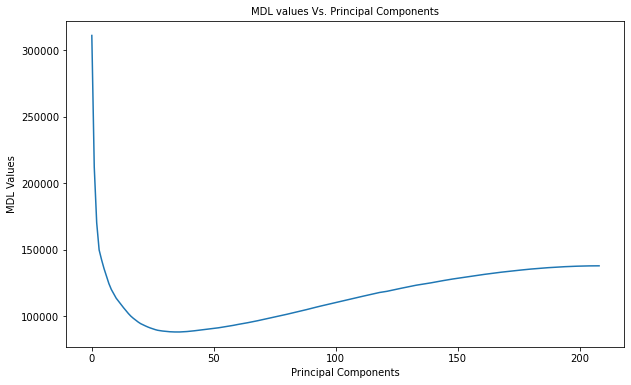

In [208]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.plot(MDL)
ax.set_title('MDL values Vs. Principal Components', fontsize = 10)
ax.set_xlabel('Principal Components', fontsize=10)
ax.set_ylabel('MDL Values', fontsize=10)
# fig.savefig('images/MDL_Values.png')
plt.show()

In [209]:
# Scree Plot to find the optimum number of Principal Components 

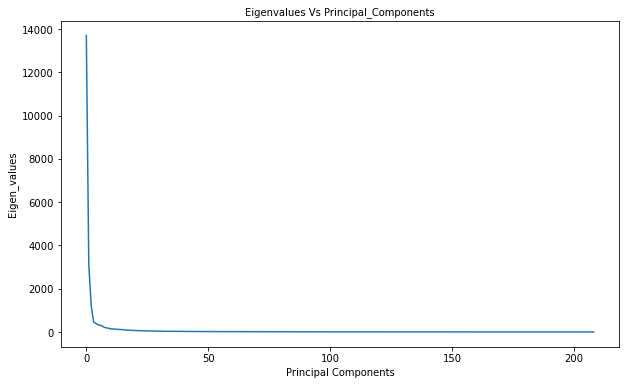

In [210]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.plot(eigen_value[0])
ax.set_title('Eigenvalues Vs Principal_Components', fontsize = 10)
ax.set_xlabel('Principal Components', fontsize=10)
ax.set_ylabel('Eigen_values', fontsize=10)
#fig.savefig('images/Scree_plot.png')
plt.show()

In [211]:
# From the graph we get the number of components as 5 where there is change in the graph 

In [212]:
# Principal Component Analysis 
# Y = data_array.eig 

# where ej= jth eigen vector of S and j = { 1 to 6 }

In [213]:
eig = eigen_value [1][:,:6] # For p=6
y = np.dot(data_array,eig)

In [214]:
# Given Sample size, n= 1, and p=6 ; Hence 
# We perform Phase analysis on the dataset 552 X 6 

# Finding Upper Control Limit (UCL) fopr the Phase-I Analysis 

# UCL= X_sqr(1-alpha)(p)  

In [228]:
alpha = 0.05
PC = 6
UCL = chi2.ppf(1 - alpha, PC)
print(UCL)

12.591587243743977


In [216]:
# For PC=6, alpha=0.05, we get the Upper Control Limit as 12.59 from the Chi square table 


In [217]:
# Hotelling Statistic 
#First Iteration

# Steps: 
# Plot the T_square Hotelling statistic for each sample. 
# Remove out-of-control samples 
# Recalculate the statistic till we are left with only in-control samples.
# Plot the T_square statistic again. 

# Formulae of T_square Statistic:
#〖T^2〗^ =(y_i-y)^T * S^(-1)* (y_i-y)

# Where y_i is the mean of y , S  is the covariance matrix of y and i= { 1..n } is the sample number


In [218]:
def get_Tsquare(y):
    ybar = np.mean(y,axis = 0)
    S_y = np.cov(y, rowvar=False)
    Tsquare = []
    n = y.shape[0]
    for i in range(n):
        Tsquare.append(np.dot(np.dot((y[i]-ybar).T,np.linalg.inv(S_y)),y[i]-ybar))
    return np.array(Tsquare)

In [219]:
Tsquare = get_Tsquare(y)

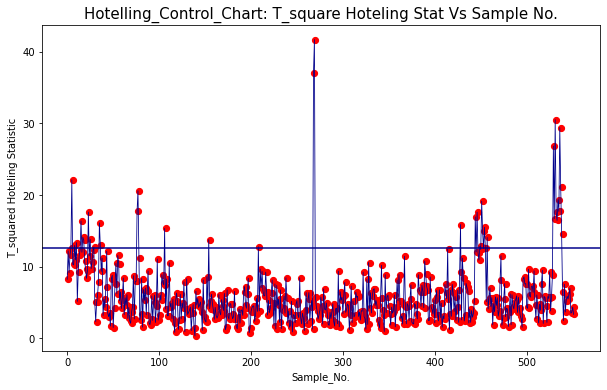

In [220]:
# PLotting the UCL plot 
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.plot(Tsquare, c = 'darkblue', linewidth = 0.8)
ax.scatter(range(1,m+1),Tsquare, c = 'red', marker = 'o', linewidth = 1.2)
ax.axhline(y = UCL, color = 'darkblue')
ax.set_title('Hotelling_Control_Chart: T_square Hoteling Stat Vs Sample No.', fontsize = 15)
ax.set_xlabel('Sample_No.', fontsize= 10)
ax.set_ylabel('T_squared Hoteling Statistic', fontsize= 10)
#fig.savefig('images/Tsquared_First_Iteration.png')
plt.show()

In [221]:
# From the graph above, we can see a lot of points which are above the UCL line; Hence the next step is to remove all the points
# Which are above the UCL line and calculate, Mean, variance, Hotelling T2 Statistic, Plot the Hotelling Control Chart 
# Till all the points come within the UCL limits of the Control Chart. 

In [222]:
# Finding the Hotelling Statistic In-Control Samples

In [223]:
def PhaseIAnalysis(y):
    n = y.shape[0]
    p = y.shape[1]
    alpha = 0.05
    UCL = chi2.ppf(1 - alpha,p)
    Tsquare = get_Tsquare(y)
    if all(Tsquare < UCL):
        return Tsquare
    else:
        return PhaseIAnalysis(y[Tsquare < UCL])

In [224]:
Tsquare = PhaseIAnalysis(y)

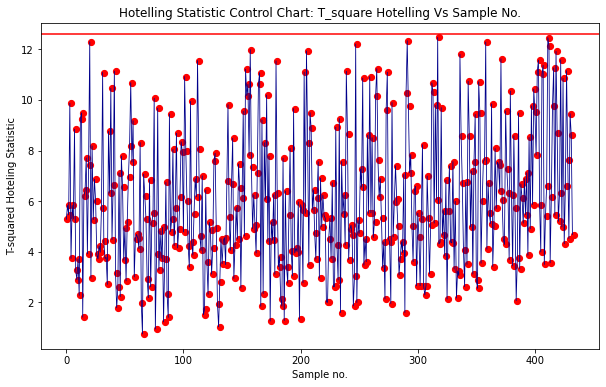

In [225]:
n = len(Tsquare)
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.plot(Tsquare, c = 'darkblue', linewidth = 0.8)
ax.scatter(range(1,n+1),Tsquare, c = 'red', marker = 'o', linewidth = 1.2)
ax.axhline(y = UCL, color = 'red')
ax.set_title('Hotelling Statistic Control Chart: T_square Hotelling Vs Sample No.')
ax.set_xlabel('Sample no.', fontsize=10)
ax.set_ylabel('T-squared Hoteling Statistic', fontsize=10)
#fig.savefig('images/Tsquared_In-control.png')
plt.show()

In [226]:
# When we see the above chart, we observe that all the samples/ points are within the control limits 

In [227]:
# Finding the number of in-control samples 
len(Tsquare)

433

In [4]:
pip install nbconvert[webpdf]

Note: you may need to restart the kernel to use updated packages.


In [6]:
nbconvert --to pdf notebook.ipynb

SyntaxError: invalid syntax (3112855160.py, line 1)

In [3]:
 jupyter nbconvert --to html notebook.ipynb

SyntaxError: invalid syntax (329779017.py, line 1)